Lambda School Data Science

*Unit 2, Sprint 1, Module 3*

---

# Ridge Regression
- Do one-hot encoding of categorical features
- Do univariate feature selection
- Use scikit-learn to fit Ridge Regression models

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

Libraries:
- category_encoders
- matplotlib
- numpy
- pandas
- scikit-learn

### Boston housing dataset

## Follow Along

Let's examine in the context of another famous housing dataset.

In [272]:
import pandas as pd
from sklearn.datasets import load_boston

# preprocessing. scale(x) is just a function, which transforms some data. preprocessing. 
# StandardScaler() is a class supporting the Transformer API.
# both make (xi-x_bar)/sigma_x
from sklearn.preprocessing import scale

boston = load_boston()
boston.data = scale(boston.data)  # Very helpful for regularization!
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['Price'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


In [273]:
df.shape

(506, 14)

In [274]:
# Let's try good old least squares!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df.drop('Price', axis='columns')
y = df.Price

lin_reg = LinearRegression().fit(X, y)
mean_squared_error(y, lin_reg.predict(X))

21.894831181729206

That seems like a pretty good score, but...

![Kitchen Sink](https://i.imgur.com/ZZxqhT1.jpg)

Chances are this doesn't generalize very well. You can verify this by splitting the data to properly test model validity.


In [275]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)
lin_reg_split = LinearRegression().fit(X_train, y_train)
print(mean_squared_error(y, lin_reg_split.predict(X)))
print(mean_squared_error(y_test, lin_reg_split.predict(X_test)))

22.347018673376052
26.273991426429014


Oops! 💥

### What can we do?

- Use fewer features - sure, but it can be a lot of work to figure out *which* features, and (in cases like this) there may not be any good reason to really favor some features over another.
- Get more data! This is actually a pretty good approach in tech, since apps generate lots of data all the time (and we made this situation by artificially constraining our data). But for case studies, existing data, etc. it won't work.
- **Regularize!**

### Regularization just means "add bias"

OK, there's a bit more to it than that. But that's the core intuition - the problem is the model working "too well", so fix it by making it harder for the model!

It may sound strange - a technique that is purposefully "worse" - but in certain situations, it can really get results.

What's bias? In the context of statistics and machine learning, bias is when a predictive model fails to identify relationships between features and the output. In a word, bias is *underfitting*.

We want to add bias to the model because of the [bias-variance tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff) - variance is the sensitivity of a model to the random noise in its training data (i.e. *overfitting*), and bias and variance are naturally (inversely) related. Increasing one will always decrease the other, with regards to the overall generalization error (predictive accuracy on unseen data).

Visually, the result looks like this:

![Regularization example plot](https://upload.wikimedia.org/wikipedia/commons/0/02/Regularization.svg)

The blue line is overfit, using more dimensions than are needed to explain the data and so much of the movement is based on noise and won't generalize well. The green line still fits the data, but is less susceptible to the noise - depending on how exactly we parameterize "noise" we may throw out actual correlation, but if we balance it right we keep that signal and greatly improve generalizability.



Data science depends on math, and math is generally focused on situations where:

1. a solution exists,
2. the solution is unique,
3. the solution's behavior changes continuously with the initial conditions.

These are known as [well-posed problems](https://en.wikipedia.org/wiki/Well-posed_problem), and are the sorts of assumptions so core in traditional techniques that it is easy to forget about them. But they do matter, as there can be exceptions:

1. no solution - e.g. no $x$ such that $Ax = b$
2. multiple solutions - e.g. several $x_1, x_2, ...$ such that $Ax = b$
3. "chaotic" systems - situations where small changes in initial conditions interact and reverberate in essentially unpredictable ways - for instance, the difficulty in longterm predictions of weather (N.B. not the same thing as longterm predictions of *climate*) - you can think of this as models that fail to generalize well, because they overfit on the training data (the initial conditions)

Problems suffering from the above are called ill-posed problems. Relating to linear algebra and systems of equations, the only truly well-posed problems are those with a single unique solution.

![Intersecting lines](https://upload.wikimedia.org/wikipedia/commons/c/c0/Intersecting_Lines.svg)

Think for a moment - what would the above plot look like if there was no solution? If there were multiple solutions? And how would that generalize to higher dimensions?

A lot of what you covered with linear regression was about getting matrices into the right shape for them to be solvable in this sense. But some matrices just won't submit to this, and other problems may technically "fit" linear regression but still be violating the above assumptions in subtle ways.

[Overfitting](https://en.wikipedia.org/wiki/Overfitting) is in some ways a special case of this - an overfit model uses more features/parameters than is "justified" by the data (essentially by the *dimensionality* of the data, as measured by $n$ the number of observations). As the number of features approaches the number of observations, linear regression still "works", but it starts giving fairly perverse results. In particular, it results in a model that fails to *generalize* - and so the core goal of prediction and explanatory power is undermined.

How is this related to well and ill-posed problems? It's not clearly a no solution or multiple solution case, but it does fall in the third category - overfitting results in fitting to the "noise" in the data, which means the particulars of one random sample or another (different initial conditions )will result in dramatically different models.


# Use sklearn.linear_model.Ridge to fit and interpret Ridge Regression models

Josh Starmer explains in his [StatQuest video on Ridge Regression:](https://youtu.be/Q81RR3yKn30?t=222)

> The main idea behind **Ridge Regression** is to find a new line that _doesn't_ fit the training data as well. In other words, we introduce a small amount of **bias** into how the new line is fit to the data. But in return for that small amount of bias we get a significant drop in **variance.** In other words, by starting with a slightly worse fit Ridge regression can provide better long-term predictions. BAM!!!

### OLS vs Mean Baseline vs Ridge on Anscombe dataset

Let's look at some examples.

First, here's a famous, tiny dataset — [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet), dataset III:
Anscombe's quartet comprises four data sets that have nearly identical simple descriptive statistics, yet have very different distributions and appear very different when graphed. Each dataset consists of eleven (x,y) points. 

<class 'pandas.core.frame.DataFrame'> (11, 3)


,dataset,x,y
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74
25,III,9.0,7.11
26,III,11.0,7.81


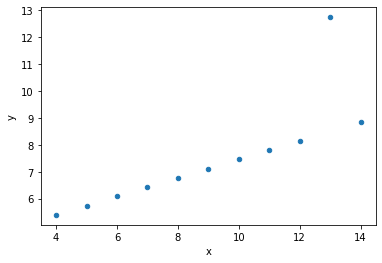

In [276]:
import seaborn as sns
anscombe = sns.load_dataset('anscombe').query('dataset=="III"')
anscombe.plot.scatter('x', 'y');
print(type(anscombe), anscombe.shape)
anscombe.head()

We'll compare:
- Ordinary Least Squares Linear Regression
- Mean Baseline
- Ridge Regression

#### OLS

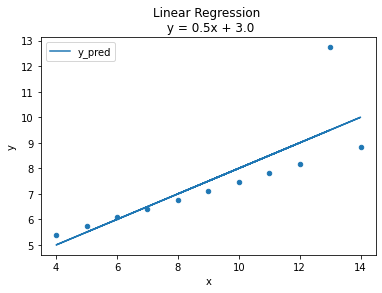

In [277]:
%matplotlib inline

# Plot data
ax = anscombe.plot.scatter('x', 'y')

# Fit linear model
ols = LinearRegression()
ols.fit(anscombe[['x']], anscombe['y'])

# Get linear equation
m = ols.coef_[0].round(2)
b = ols.intercept_.round(2)
title = f'Linear Regression \n y = {m}x + {b}'

# Get predictions
anscombe['y_pred'] = ols.predict(anscombe[['x']])

# Plot predictions
anscombe.plot('x', 'y_pred', ax=ax, title=title);

#### Mean Baseline

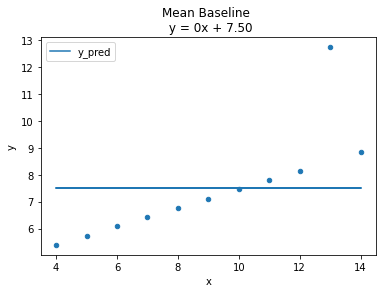

In [278]:
# Plot data
ax = anscombe.plot.scatter('x', 'y')

# Mean baseline
mean = anscombe['y'].mean()
anscombe['y_pred'] = mean
title = f'Mean Baseline \n y = 0x + {mean:.2f}'

# Plot "predictions"
anscombe.plot('x', 'y_pred', ax=ax, title=title);

#### Ridge Regression

With increasing regularization:

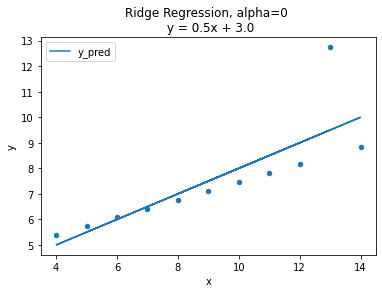

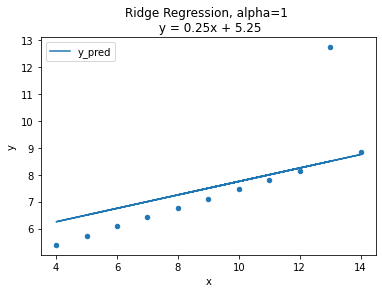

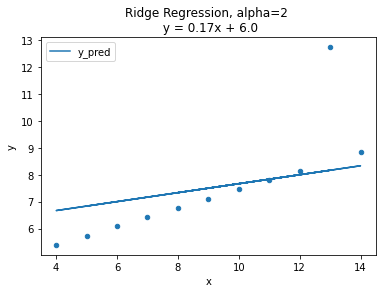

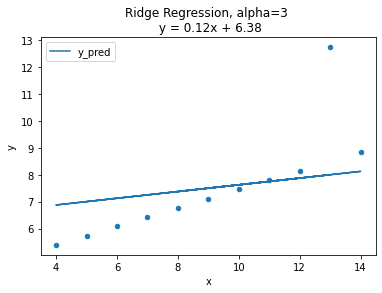

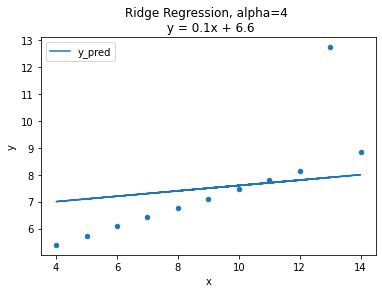

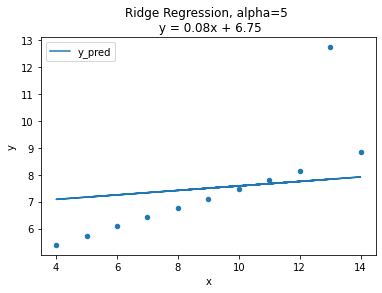

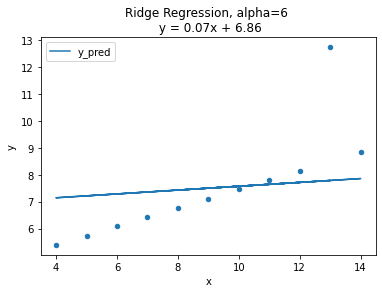

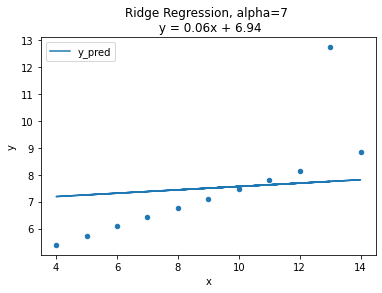

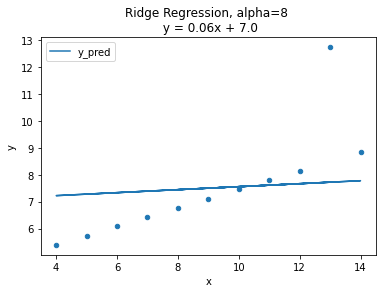

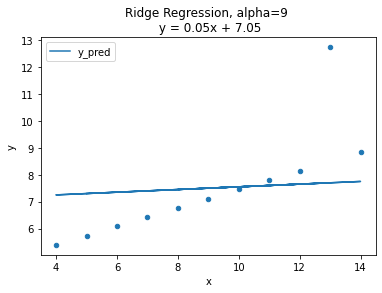

In [279]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

def ridge_anscombe(alpha):
    """
    Fit & plot a ridge regression model,
    with Anscombe Quartet dataset III.

    alpha : positive float, regularization strength
    """

    # Load data
    anscombe = sns.load_dataset('anscombe').query('dataset=="III"')

    # Plot data
    ax = anscombe.plot.scatter('x', 'y')

    # Fit linear model
    ridge = Ridge(alpha=alpha, normalize=True)
    ridge.fit(anscombe[['x']], anscombe['y'])

    # Get linear equation
    m = ridge.coef_[0].round(2)
    b = ridge.intercept_.round(2)
    title = f'Ridge Regression, alpha={alpha} \n y = {m}x + {b}'

    # Get predictions
    anscombe['y_pred'] = ridge.predict(anscombe[['x']])

    # Plot predictions
    anscombe.plot('x', 'y_pred', ax=ax, title=title)
    plt.show()
    
    
for alpha in range(10):
    ridge_anscombe(alpha=alpha)

When the Ridge Regression has no regularization (`alpha=0`) then it is identical to Ordinary Least Squares Regression.

When we increase the regularization, the predictions looks less and less like OLS and more and more like the mean baseline. The predictions are less sensitive to changes in the independent variable.

### RidgeCV

You may ask, how should we decide the amount of regularization?

[The StatQuest video answers,](https://youtu.be/Q81RR3yKn30?t=602)

> So how do we decide what value to give lambda? We just try a bunch of values for lambda, and use cross-validation
typically 10-fold cross-validation, to determine which one results in the lowest variance. DOUBLE BAM!!!

You'll learn more about cross-validation next sprint. For now, the good news is scikit-learn gives us [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html), "Ridge regression with built-in cross-validation."

Also, notice that scikit-learn calls the regularization parameter "alpha", but StatQuest calls it "lambda." The greek letters are different, but the concept is the same.

Let's try these values for alpha:

In [280]:
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

We'll use [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) to find the best alpha:
RidgeCV performs Generalized Cross-Validation, which is a form of efficient Leave-One-Out cross-validation.

In [281]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas=alphas, normalize=True)
ridge.fit(anscombe[['x']], anscombe['y'])

# .alpha_ is Estimated regularization parameter.
ridge.alpha_

0.1

The fit looks similar to Ordinary Least Squares Regression, but slightly less influenced by the outlier:

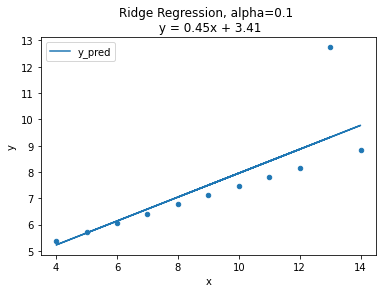

In [282]:
# Plot data
ax = anscombe.plot.scatter('x', 'y')

# Get linear equation
m = ridge.coef_[0].round(2)
b = ridge.intercept_.round(2)
title = f'Ridge Regression, alpha={ridge.alpha_} \n y = {m}x + {b}'

# Get predictions
anscombe['y_pred'] = ridge.predict(anscombe[['x']])

# Plot predictions
anscombe.plot('x', 'y_pred', ax=ax, title=title)
plt.show()

### What's the intuition? What are we doing?

The `alpha` parameter corresponds to the weight being given to the extra penalty being calculated by [Tikhonov regularization](https://en.wikipedia.org/wiki/Tikhonov_regularization) (this parameter is sometimes referred to as $\lambda$ in the context of ridge regression).

Normal linear regression (OLS) minimizes the **sum of square error of the residuals**.

Ridge regression minimizes the **sum of square error of the residuals** *AND* **the squared slope of the fit model, times the alpha parameter**.

This is why the MSE for the first model in the for loop (`alpha=0`) is the same as the MSE for linear regression - it's the same model!

As `alpha` is increased, we give more and more penalty to a steep slope. In two or three dimensions this is fairly easy to visualize - beyond, think of it as penalizing coefficient size. Each coefficient represents the slope of an individual dimension (feature) of the model, so ridge regression is just squaring and summing those.

So while `alpha=0` reduces to OLS, as `alpha` approaches infinity eventually the penalty gets so extreme that the model will always output every coefficient as 0 (any non-zero coefficient resulting in a penalty that outweighs whatever improvement in the residuals), and just fit a flat model with intercept at the mean of the dependent variable.

Of course, what we want is somewhere in-between these extremes. Intuitively, what we want to do is apply an appropriate "cost" or penalty to the model for fitting parameters, much like adjusted $R^2$ takes into account the cost of adding complexity to a model. What exactly is an appropriate penalty will vary, so you'll have to put on your model comparison hat and give it a go!

PS - scaling the data helps, as that way this cost is consistent and can be added uniformly across features, and it is simpler to search for the `alpha` parameter.



### And a bit more math

The regularization used by Ridge Regression is also known as **$L^2$ regularization**, due to the squaring of the slopes being summed. This corresponds to [$L^2$ space](https://en.wikipedia.org/wiki/Square-integrable_function), a metric space of square-integrable functions that generally measure what we intuitively think of as "distance" (at least, on a plane) - what is referred to as Euclidean distance.

The other famous norm is $L^1$, also known as [taxicab geometry](https://en.wikipedia.org/wiki/Taxicab_geometry), because it follows the "grid" to measure distance like a car driving around city blocks (rather than going directly like $L^2$). When referred to as a distance this is called "Manhattan distance", and can be used for regularization (see [LASSO](https://en.wikipedia.org/wiki/Lasso_(statistics%29), which [uses the $L^1$ norm](https://www.quora.com/What-is-the-difference-between-L1-and-L2-regularization-How-does-it-solve-the-problem-of-overfitting-Which-regularizer-to-use-and-when)).

All this comes down to - regularization means increasing model bias by "watering down" coefficients with a penalty typically based on some sort of distance metric, and thus reducing variance (overfitting the model to the noise in the data). It gives us another lever to try and another tool for our toolchest!

### Putting it all together - one last example

The official scikit-learn documentation has many excellent examples - [this one](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html#sphx-glr-auto-examples-linear-model-plot-ols-ridge-variance-py) illustrates how ridge regression effectively reduces the variance, again by increasing the bias, penalizing coefficients to reduce the effectiveness of features (but also the impact of noise).

In [283]:
X_train = np.c_[.5, 1].T
X_train

array([[0.5],
       [1. ]])

In [284]:
classifiers = dict(ols=linear_model.LinearRegression(),
                   ridge=linear_model.Ridge(alpha=.1))
classifiers

{'ols': LinearRegression(), 'ridge': Ridge(alpha=0.1)}

In [285]:
np.random.normal(size=(2, 1)) 

array([[ 2.26975462],
       [-1.45436567]])

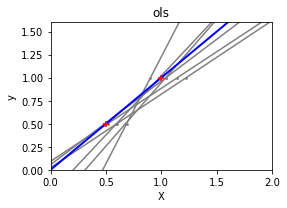

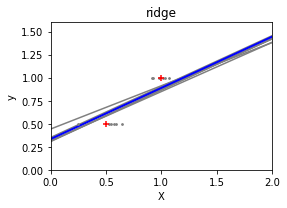

In [286]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause


import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

X_train = np.c_[.5, 1].T
y_train = [.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(ols=linear_model.LinearRegression(),
                   ridge=linear_model.Ridge(alpha=.1))

for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(4, 3))

    for _ in range(6):
        this_X = .1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color='gray')
        ax.scatter(this_X, y_train, s=3, c='gray', marker='o', zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color='blue')
    ax.scatter(X_train, y_train, s=30, c='red', marker='+', zorder=10)

    ax.set_title(name)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel('X')
    ax.set_ylabel('y')

    fig.tight_layout()

plt.show()

This shows that Ridge is more robust in filtering out the noise and not reacting to it.

### NewYork housing dataset

In [287]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://github.com/skhabiri/PredictiveModeling-LinearModels-u2s1/tree/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

### one-hot encoding of categorical features

First, let's load the NYC apartment rental listing data:

In [288]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Statistical Trimming
# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

# Do train/test split
# Use data from April & May 2016 to train
# Use data from June 2016 to test
df['created'] = pd.to_datetime(df['created'], infer_datetime_format=True)
cutoff = pd.to_datetime('2016-06-01')
# train on older data and predict recent data
train = df[df.created < cutoff]
test  = df[df.created >= cutoff]

Some columns are numeric:

In [289]:
train.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
bathrooms,31844.0,1.203728,0.472447,0.0000,1.0000,1.0000,1.0000,10.0000
bedrooms,31844.0,1.528357,1.105061,0.0000,1.0000,1.0000,2.0000,7.0000
latitude,31844.0,40.750743,0.038658,40.5757,40.7285,40.7517,40.7736,40.9102
longitude,31844.0,-73.972867,0.028910,-74.0873,-73.9918,-73.9781,-73.9550,-73.7001
price,31844.0,3575.604007,1762.136694,1375.0000,2500.0000,3150.0000,4095.0000,15500.0000
elevator,31844.0,0.530430,0.499081,0.0000,0.0000,1.0000,1.0000,1.0000
cats_allowed,31844.0,0.477139,0.499485,0.0000,0.0000,0.0000,1.0000,1.0000
hardwood_floors,31844.0,0.480907,0.499643,0.0000,0.0000,0.0000,1.0000,1.0000
dogs_allowed,31844.0,0.445861,0.497068,0.0000,0.0000,0.0000,1.0000,1.0000
doorman,31844.0,0.430725,0.495185,0.0000,0.0000,0.0000,1.0000,1.0000


Some columns are _not_ numeric:

In [290]:
# Sort along axis=0, by "unique" column label
train.select_dtypes(exclude='number').describe().T.sort_values(by='unique')

/Users/shahnam/.pyenv/versions/3.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,count,unique,top,freq,first,last
interest_level,31844,3,low,22053,NaT,NaT
display_address,31775,6468,Broadway,273,NaT,NaT
street_address,31838,11280,505 West 37th Street,120,NaT,NaT
description,30875,25735,,906,NaT,NaT
created,31844,31436,2016-05-14 01:11:03,3,2016-04-01 22:12:41,2016-05-31 23:10:48


In [291]:
# index the data denoted by groupby 
train.groupby('interest_level').mean()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,...,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
interest_level,,,,,,,,,,,,,,,,,,,,,
high,1.119502,1.560166,40.747328,-73.967399,2728.689212,0.482158,0.424896,0.537344,0.382573,0.292946,...,0.097510,0.068880,0.043568,0.045643,0.058506,0.063071,0.051037,0.050622,0.030290,0.040664
low,1.225752,1.494989,40.751766,-73.973664,3802.227633,0.530313,0.496758,0.432186,0.467419,0.453317,...,0.078175,0.055593,0.055095,0.047749,0.042534,0.042443,0.040901,0.034417,0.027343,0.025484
medium,1.165425,1.617667,40.748802,-73.972270,3175.026013,0.546538,0.435578,0.608048,0.402114,0.408210,...,0.116922,0.073432,0.062458,0.064490,0.059748,0.034955,0.051890,0.049858,0.030890,0.035903


Let's look at the relationship between `interest_level` and `price`:

In [292]:
train.groupby('interest_level')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
interest_level,,,,,,,,
high,2410.0,2728.689212,1125.654965,1375.0,1900.0,2450.0,3200.0,11000.0
low,22053.0,3802.227633,1910.469337,1375.0,2600.0,3300.0,4384.0,15500.0
medium,7381.0,3175.026013,1236.912369,1375.0,2300.0,2895.0,3695.0,14000.0


In [293]:
train.groupby('interest_level')['price'].mean()

interest_level
high      2728.689212
low       3802.227633
medium    3175.026013
Name: price, dtype: float64

Interest Level seems like a useful, predictive feature. But it's a string — and our scikit-learn models expect all inputs to be numbers. 

So, we can "one-hot encode" the feature.

To go from this:

| interest_level |
|----------------|
| high           |
| medium         |
| low            |


To this:

| interest_level_high | interest_level_medium | interest_level_low |
|---------------------|-----------------------|--------------------|
| 1                   | 0                     | 0                  |
| 0                   | 1                     | 0                  |
| 0                   | 0                     | 1                  |

"One-hot encoding" adds a dimension for each unique value of each categorical feature. So, it may not be a good choice for "high cardinality" categoricals that have dozens, hundreds, or thousands of unique values. 

[Cardinality](https://simple.wikipedia.org/wiki/Cardinality) means the number of unique values that a feature has:
> In mathematics, the cardinality of a set means the number of its elements. For example, the set A = {2, 4, 6} contains 3 elements, and therefore A has a cardinality of 3. 

## Follow Along

The other non-numeric columns have high cardinality. So let's exclude them from our features for now.

In [294]:
target = 'price'
high_cardinality = ['display_address', 'street_address', 'description', 'created']

#drop method on pandas Series
features = train.columns.drop([target] + high_cardinality)
# alternatively, drop metho on pandas DataFrame
# train.drop([target] + high_cardinality, axis=1, inplace=True)

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

Here's what `X_train` looks like **before** encoding:

In [295]:
X_train.head()

,bathrooms,bedrooms,latitude,longitude,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,...,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
2,1.0,1,40.7388,-74.0018,high,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1,40.7539,-73.9677,low,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,4,40.8241,-73.9493,low,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.0,4,40.7429,-74.0028,medium,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1.0,2,40.8012,-73.9660,low,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Use [OneHotEncoder](https://contrib.scikit-learn.org/category_encoders/onehot.html) from the [category_encoders](https://github.com/scikit-learn-contrib/category_encoders) library to encode any non-numeric features. (In this case, it's just `interest_level`.)

- Use the **`fit_transform`** method on the **train** set
- Use the **`transform`** method on **validation / test** sets

In [296]:
import category_encoders as ce
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

/Users/shahnam/.pyenv/versions/3.7.8/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Here's what it looks like **after:**

In [297]:
X_train.head(3)

,bathrooms,bedrooms,latitude,longitude,interest_level_high,interest_level_low,interest_level_medium,elevator,cats_allowed,hardwood_floors,...,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
2,1.0,1,40.7388,-74.0018,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1,40.7539,-73.9677,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1.0,4,40.8241,-73.9493,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Feature engineering and univariate feature selection using SelectKBest

The previous assignment quoted Wikipedia on [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering):

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

Pedro Domingos says, "the most important factor is the **features used**."

This includes not just **Feature Engineering** (making new features, representing features in new ways) but also **Feature Selection** (choosing which features to include and which to exclude).

There are _many_ specific tools and techniques for feature selection.

- Today we'll try [scikit-learn's `SelectKBest` transformer](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection), for "univariate, forward selection."
- Later we'll try another technique, ["permutation importance"](https://www.kaggle.com/dansbecker/permutation-importance)
- If you want to explore even more options, here are some good resources!
  - [scikit-learn's User Guide for Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html)
  - [mlxtend](http://rasbt.github.io/mlxtend/) library
  - scikit-learn-contrib libraries: [boruta_py](https://github.com/scikit-learn-contrib/boruta_py) & [stability-selection](https://github.com/scikit-learn-contrib/stability-selection)
  - [_Feature Engineering and Selection_](http://www.feat.engineering/) by Kuhn & Johnson.


My general recommendation is:

> Predictive accuracy on test sets is the criterion for how good the model is. — Leo Breiman, ["Statistical Modeling: The Two Cultures"](https://projecteuclid.org/download/pdf_1/euclid.ss/1009213726)

First, let's engineer a few more features to select from. This is a partial example solution from the previous assignment.

In [298]:
def engineer_features(X):
    
    # Avoid SettingWithCopyWarning
    X = X.copy()
    # How many total perks does each apartment have?
    perk_cols = ['elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
                 'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
                 'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
                 'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
                 'swimming_pool', 'new_construction', 'exclusive', 'terrace', 
                 'loft', 'garden_patio', 'common_outdoor_space', 
                 'wheelchair_access']
    X['perk_count'] = X[perk_cols].sum(axis=1)

    # Are cats or dogs allowed?
    X['cats_or_dogs'] = (X['cats_allowed']==1) | (X['dogs_allowed']==1)

    # Are cats and dogs allowed?
    X['cats_and_dogs'] = (X['cats_allowed']==1) & (X['dogs_allowed']==1)

    # Total number of rooms (beds + baths)
    X['rooms'] = X['bedrooms'] + X['bathrooms']

    return X


In [299]:
X_train = engineer_features(X_train)
X_test = engineer_features(X_test)
X_train1 = X_train.copy()
X_test1 = X_test.copy()
y_train1 = y_train.copy()
y_test1 = y_test.copy()

### Could we try every possible feature combination?

The number of [combinations](https://en.wikipedia.org/wiki/Combination) is shocking!

In [300]:
# How many features do we have currently?
features = X_train.columns
n = len(features)
n

35

In [301]:
# How many ways to choose 1 to n features?
from math import factorial

# The order doesn't matter
def n_choose_k(n, k):
    return factorial(n)/(factorial(k)*factorial(n-k))

combinations = sum(n_choose_k(n,k) for k in range(1,n+1))
print(f'{combinations:,.0f}')

34,359,738,367


In [302]:
print(type(n_choose_k(n,k) for k in range(1,n+1)))
sum(range(1,4,1))

<class 'generator'>


6

In [303]:
# Alternatively, each of 35 features can be selected or not minues the case that no feature is selected
2**35 - 1

34359738367

We can't try every possible combination, but we can try some. For example, we can use univariate statistical tests to measure the correlation between each feature and the target, and select the k best features.

### Follow Along

Refer to the [Scikit-Learn User Guide on Univariate Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection).

f_regression applies a Univariate linear regression tests. This is done by computing the correlation of each regressor and the target. The result is converted to F-score and pval
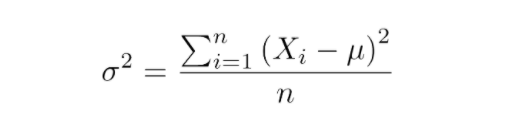
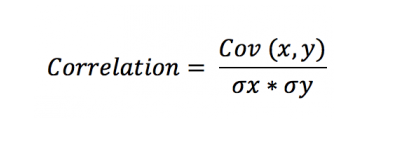
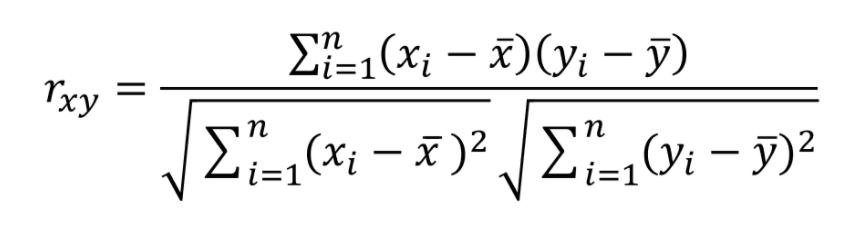

In [304]:
from sklearn.feature_selection import f_regression, SelectKBest

# Select the 15 features that best correlate with the target
# (15 is an abritrary starting point here)

# Similar API to what we've seen before
selector = SelectKBest(score_func=f_regression, k=15)

# IMPORTANT!
# .fit_transform on the train set
# .transform on test set
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
X_train_selected.shape, X_test_selected.shape

((31844, 15), (16973, 15))

In [305]:
print(type(X_train_selected))
X_train_selected

<class 'numpy.ndarray'>


array([[1.0, 1, -74.0018, ..., 0, 3, 2.0],
       [1.0, 1, -73.9677, ..., 0, 2, 2.0],
       [1.0, 4, -73.9493, ..., 0, 1, 5.0],
       ...,
       [1.0, 1, -73.99, ..., 0, 5, 2.0],
       [1.0, 0, -74.0101, ..., 0, 5, 1.0],
       [1.0, 2, -73.9172, ..., 0, 1, 3.0]], dtype=object)

In [306]:
# Which features were selected?
all_names = X_train.columns

# boolean mask of selected features
selected_mask = selector.get_support()
print(selected_mask)

selected_names = all_names[selected_mask]
unselected_names = all_names[~selected_mask]

print('Features selected:')
for name in selected_names:
    print(name)

print('\n')
print('Features not selected:')
for name in unselected_names:
    print(name)


[ True  True False  True  True  True False  True False False False  True
  True False False  True False  True False  True  True False False False
 False  True False False False False False  True False False  True]
Features selected:
bathrooms
bedrooms
longitude
interest_level_high
interest_level_low
elevator
doorman
dishwasher
fitness_center
laundry_in_unit
outdoor_space
dining_room
terrace
perk_count
rooms


Features not selected:
latitude
interest_level_medium
cats_allowed
hardwood_floors
dogs_allowed
no_fee
laundry_in_building
pre-war
roof_deck
high_speed_internet
balcony
swimming_pool
new_construction
exclusive
loft
garden_patio
wheelchair_access
common_outdoor_space
cats_or_dogs
cats_and_dogs


### How many features should be selected in SelectKBest?
- You can try a range of values for k, then choose the model with the best score. If multiple models "tie" for the best score, choose the simplest model. You decide what counts as a tie!

In [307]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

for k in range(1, len(X_train.columns)+1):
    print(f'{k} features')

    selector = SelectKBest(score_func=f_regression, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_selected, y_train)

    y_pred = model.predict(X_test_selected)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Test Mean Absolute Error: ${mae:,.0f} \n')

1 features
Test Mean Absolute Error: $890 

2 features
Test Mean Absolute Error: $826 

3 features
Test Mean Absolute Error: $826 

4 features
Test Mean Absolute Error: $800 

5 features
Test Mean Absolute Error: $800 

6 features
Test Mean Absolute Error: $773 

7 features
Test Mean Absolute Error: $713 

8 features
Test Mean Absolute Error: $713 

9 features
Test Mean Absolute Error: $713 

10 features
Test Mean Absolute Error: $713 

11 features
Test Mean Absolute Error: $711 

12 features
Test Mean Absolute Error: $684 

13 features
Test Mean Absolute Error: $684 

14 features
Test Mean Absolute Error: $682 

15 features
Test Mean Absolute Error: $682 

16 features
Test Mean Absolute Error: $683 

17 features
Test Mean Absolute Error: $683 

18 features
Test Mean Absolute Error: $683 

19 features
Test Mean Absolute Error: $683 

20 features
Test Mean Absolute Error: $681 

21 features
Test Mean Absolute Error: $679 

22 features
Test Mean Absolute Error: $678 

23 features
Test Me

## Overfitting and Regularization

In your assignment, you will do feature selection with SelectKBest.

You'll go back to our other New York City real estate dataset. Instead of predicting apartment rents, you'll predict property sales prices. But not just for condos in Tribeca. Instead, you'll predict property sales prices for One Family Dwellings, where the sale price was more than 100 thousand and less than 2 million.

If you run the above code cell with your assignment dataset, you will probably get some shocking results like these:

```
1 features
Test MAE: $183,641 

2 features
Test MAE: $182,569 

3 features
Test MAE: $182,569 

4 features
Test MAE: $183,441 

5 features
Test MAE: $186,532 

6 features
Test MAE: $176,121 

7 features
Test MAE: $177,001 

8 features
Test MAE: $176,707 

9 features
Test MAE: $170,969 

10 features
Test MAE: $170,977 

11 features
Test MAE: $170,507 

12 features
Test MAE: $162,301 

13 features
Test MAE: $163,559 

14 features
Test MAE: $162,562 

15 features
Test MAE: $162,550 

16 features
Test MAE: $162,678 

17 features
Test MAE: $162,419 

18 features
Test MAE: $162,177 

19 features
Test MAE: $162,177 

20 features
Test MAE: $157,893 

21 features
Test MAE: $157,966 

22 features
Test MAE: $157,966 

23 features
Test MAE: $157,966 

24 features
Test MAE: $157,630 

25 features
Test MAE: $157,580 

26 features
Test MAE: $25,968,990,575,776,280 

27 features
Test MAE: $157,550 

28 features
Test MAE: $87,300,193,986,380,608 

29 features
Test MAE: $158,491 

30 features
Test MAE: $17,529,140,644,990,770 

31 features
Test MAE: $24,191,458,933,688,856 

32 features
Test MAE: $15,214,122,471,992,104 

33 features
Test MAE: $15,539,731,847,001,626 

34 features
Test MAE: $26,823,915,969,200,480 

35 features
Test MAE: $3,813,290,272,870,121 

36 features
Test MAE: $157,900 

37 features
Test MAE: $157,900 

38 features
Test MAE: $158,911 

39 features
Test MAE: $9,101,846,282,581,472 

40 features
Test MAE: $1,424,168,120,777,820 

41 features
Test MAE: $158,261 

42 features
Test MAE: $158,261 

43 features
Test MAE: $4,784,333,158,313,152 

44 features
Test MAE: $1,329,759,264,341,476 

45 features
Test MAE: $158,451 

46 features
Test MAE: $158,450 

47 features
Test MAE: $158,450 

48 features
Test MAE: $1,331,383,815,682,658 

49 features
Test MAE: $1,504,319,420,789,134 

50 features
Test MAE: $2,285,927,437,866,492
```

Why did the error blow up with 26 features? We can look at the coefficients of the selected features:

```
BLOCK                                                  -97,035
ZIP_CODE                                              -152,985
COMMERCIAL_UNITS                    -4,115,324,664,197,034,496
TOTAL_UNITS                         -2,872,516,607,892,124,160
GROSS_SQUARE_FEET                                      123,739
BOROUGH_3                                              146,876
BOROUGH_4                                              197,262
BOROUGH_2                                              -55,917
BOROUGH_5                                              -84,107
NEIGHBORHOOD_OTHER                                      56,036
NEIGHBORHOOD_FLUSHING-NORTH                             63,394
NEIGHBORHOOD_FOREST HILLS                               46,411
NEIGHBORHOOD_BOROUGH PARK                               29,915
TAX_CLASS_AT_PRESENT_1D               -545,831,543,721,722,112
BUILDING_CLASS_AT_PRESENT_A5                            -1,673
BUILDING_CLASS_AT_PRESENT_A3             5,516,361,218,128,626
BUILDING_CLASS_AT_PRESENT_S1         1,735,885,668,110,473,216
BUILDING_CLASS_AT_PRESENT_A6           -25,974,113,243,185,788
BUILDING_CLASS_AT_PRESENT_A8          -760,608,646,332,801,664
BUILDING_CLASS_AT_PRESENT_S0           941,854,072,479,442,176
BUILDING_CLASS_AT_TIME_OF_SALE_A5                      -24,599
BUILDING_CLASS_AT_TIME_OF_SALE_A3       -5,516,361,218,111,506
BUILDING_CLASS_AT_TIME_OF_SALE_S1    4,253,055,231,847,939,072
BUILDING_CLASS_AT_TIME_OF_SALE_A6       25,974,113,243,176,404
BUILDING_CLASS_AT_TIME_OF_SALE_A8     -541,733,439,448,260,800
BUILDING_CLASS_AT_TIME_OF_SALE_S0      990,851,394,820,416,512
```

These were the coefficients that minimized the sum of squared errors in the training set. But this model has become too complex, with extreme coefficients that can lead to extreme predictions on new unseen data. 

**This linear model needs _regularization._ Ridge Regression to the rescue!**

### Apply Ridge Regression to regularize New York City dataset

Let's go back to our other New York City dataset, to demonstrate regularization with Ridge Regresson:

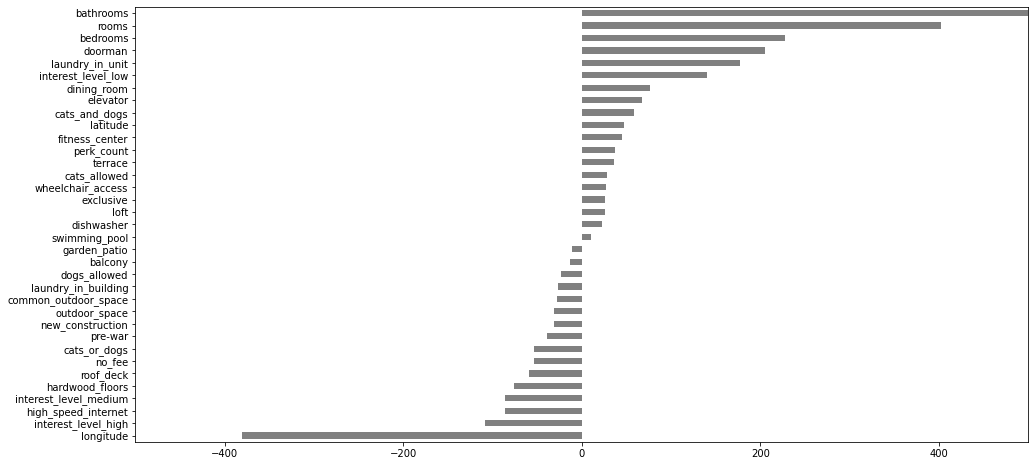

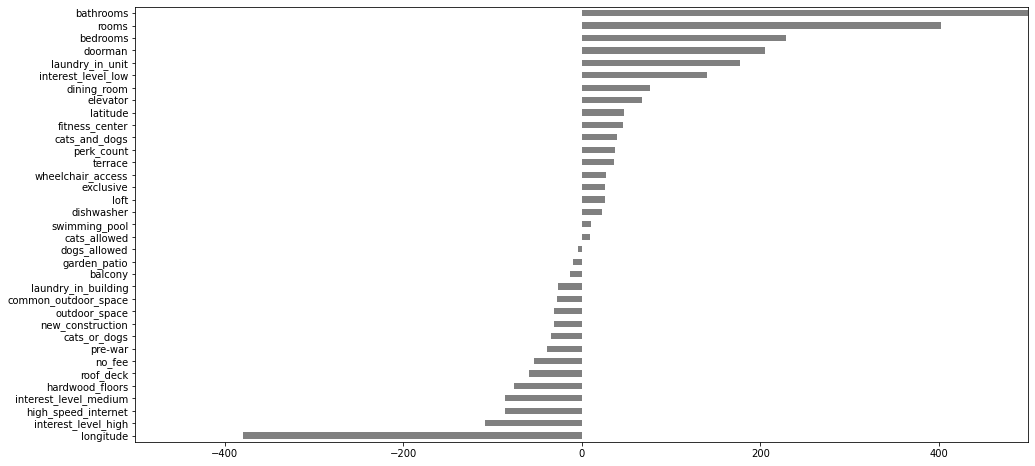

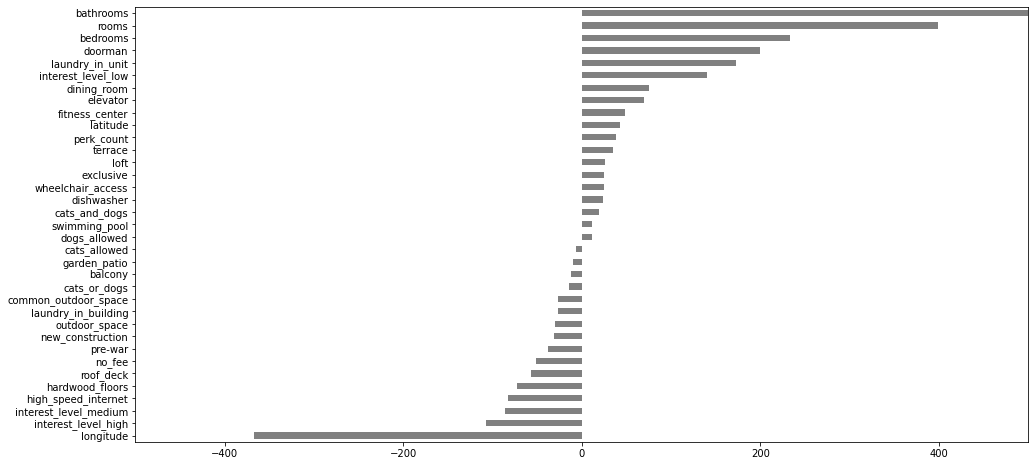

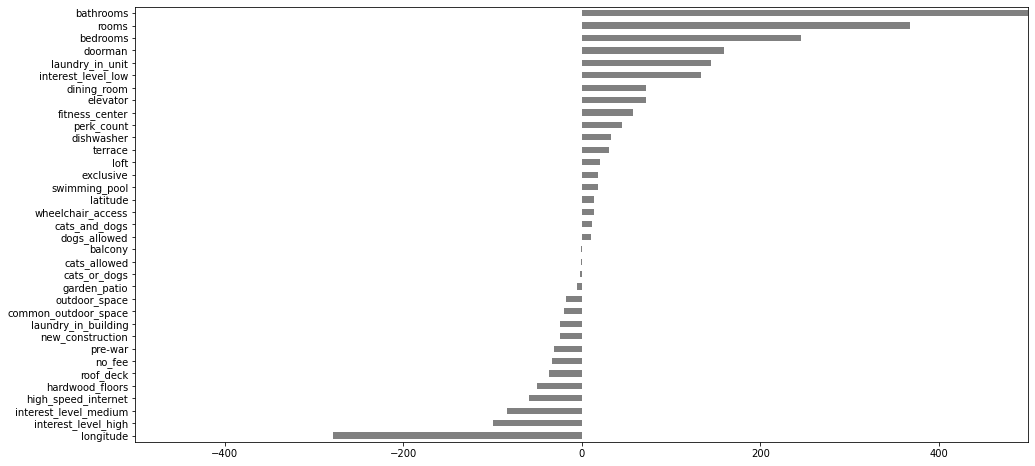

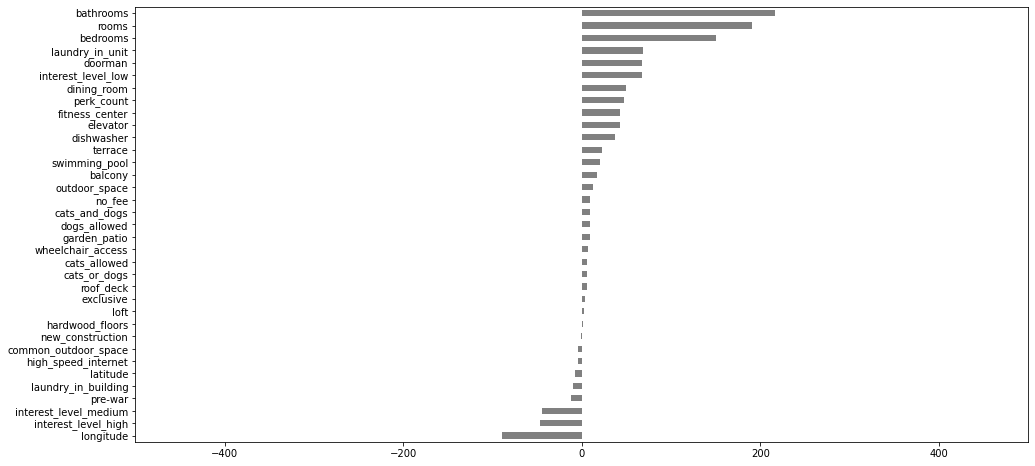

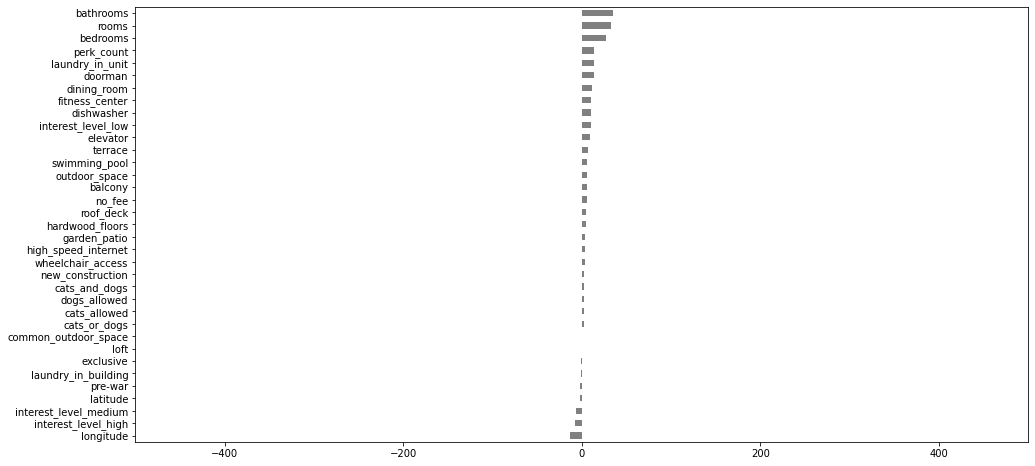

In [308]:
%matplotlib inline
from IPython.display import display, HTML
from ipywidgets import interact
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler


# Try a range of alpha parameters for Ridge Regression.

# The scikit-learn docs explain, 
# alpha : Regularization strength; must be a positive float. Regularization 
# improves the conditioning of the problem and reduces the variance of the 
# estimates. Larger values specify stronger regularization.
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

for alpha in [10**1, 10**2, 10**3, 10**4, 10**5, 10**6]:
    
    # Scale data before doing Ridge Regression
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit Ridge Regression model
    display(HTML(f'Ridge Regression, with alpha={alpha}'))
    model = Ridge(alpha=alpha)
    model.fit(X_train_scaled, y_train)

    # Get Train MAE
    y_pred = model.predict(X_train_scaled)
    mae = mean_absolute_error(y_train, y_pred)
    display(HTML(f'Train Mean Absolute Error: ${mae:,.0f}'))

    # Get Test MAE
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    display(HTML(f'Test Mean Absolute Error: ${mae:,.0f}'))
    
    # Plot coefficients
    coefficients = pd.Series(data=model.coef_, index=X_train.columns)
    plt.figure(figsize=(16,8))
    coefficients.sort_values().plot.barh(color='grey')
    plt.xlim(-500,500)
    plt.show()

### Select the value of alpha fro regularization

How to tune alpha? We can loop over alpha values or use RidgeCV to find the best alpha with k-fold cross validation method.
In looping over alpha we look at the MSE of test data.

In [309]:
alphas = []
mses = []

for alpha in np.arange(0.1, 70, 1):
    ridge_reg_split = Ridge(alpha=alpha).fit(X_train_scaled, y_train)
    mse = mean_squared_error(y_test, ridge_reg_split.predict(X_test_scaled))
    alphas.append(alpha)
    mses.append(mse)

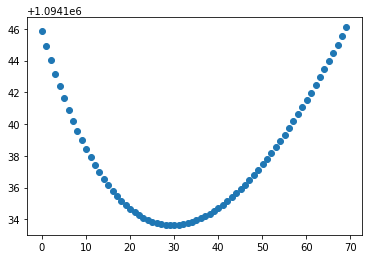

In [310]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(alphas, mses);

 Using cross validation method

In [332]:
from sklearn import metrics
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [335]:
alphas = [a for a in np.arange(0.1, 200, 1)]
ridge = RidgeCV(alphas=alphas, cv=20, scoring= 'neg_mean_squared_error')
ridge.fit(np.vstack((X_train_scaled,X_test_scaled)), np.concatenate((y_train, y_test)))

# .alpha_ is Estimated regularization parameter.
ridge.alpha_

178.1

## Challenge

In your assignment, you will fit a Ridge Regression model. You can try Linear Regression too — depending on how many features you select, your errors will probably blow up!

# Review

For your assignment, we're going back to our other **New York City** real estate dataset. Instead of predicting apartment rents, you'll predict property sales prices.

But not just for condos in Tribeca...

Instead, predict property sales prices for **One Family Dwellings** (`BUILDING_CLASS_CATEGORY` == `'01 ONE FAMILY DWELLINGS'`). 

Use a subset of the data where the **sale price was more than \\$100 thousand and less than $2 million.** 

You'll practice all of the module's objectives to build your best model yet!

# Sources

Resources:
- https://www.quora.com/What-is-regularization-in-machine-learning
- https://blogs.sas.com/content/subconsciousmusings/2017/07/06/how-to-use-regularization-to-prevent-model-overfitting/
- https://machinelearningmastery.com/introduction-to-regularization-to-reduce-overfitting-and-improve-generalization-error/
- https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b
- https://stats.stackexchange.com/questions/111017/question-about-standardizing-in-ridge-regression#111022